In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/mydramalist-complete-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("../input/mydramalist-complete-dataset/thisIsLast.csv")
df.head()

#https://www.kaggle.com/code/shivanirana63/netflix-eda-movie-recommendation-system/notebook

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9657 non-null   object 
 1   category         9657 non-null   object 
 2   country          9657 non-null   object 
 3   num_episodes     4823 non-null   float64
 4   aired            9657 non-null   object 
 5   orginal_network  4474 non-null   object 
 6   duration         9381 non-null   object 
 7   watchers         9657 non-null   object 
 8   director         7243 non-null   object 
 9   screenwriter     4576 non-null   object 
 10  rating           9657 non-null   object 
 11  num_raters       9657 non-null   object 
 12  cast_names       9560 non-null   object 
 13  genre_names      9580 non-null   object 
 14  tag_names        9657 non-null   object 
 15  synopsis         9463 non-null   object 
 16  url              9657 non-null   object 
 17  Unnamed: 17   

In [5]:
df['rating']

0       8.7
1       8.8
2       8.3
3       8.7
4       9.2
       ... 
9652    7.9
9653    7.9
9654    7.9
9655    7.9
9656    7.9
Name: rating, Length: 9657, dtype: object

In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

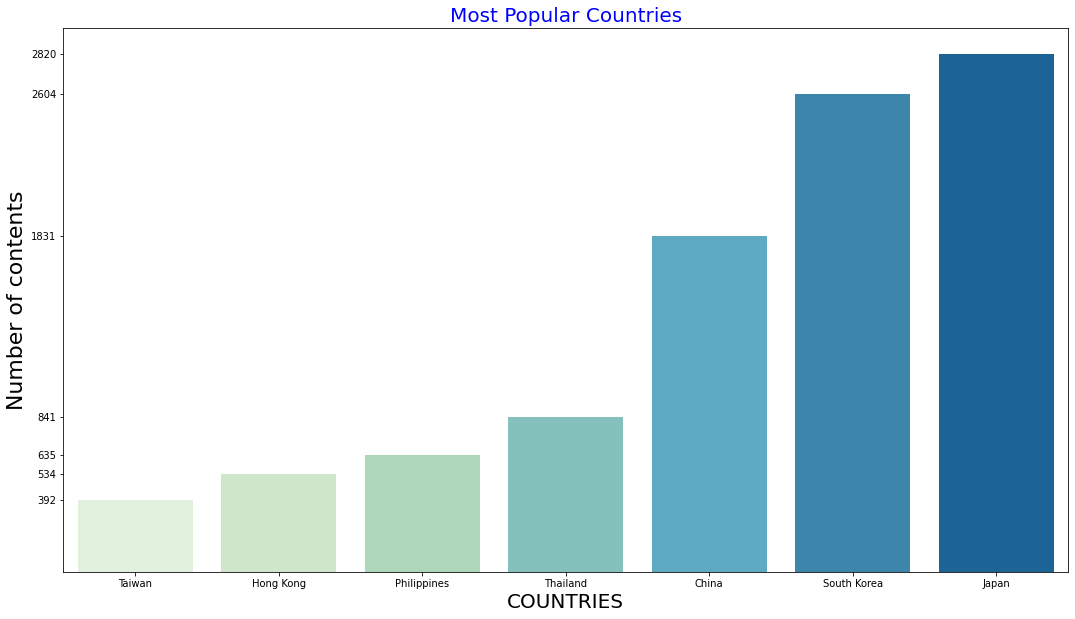

In [7]:
plt.figure(figsize=(18,10))
sb.barplot(x= df.country.value_counts()[:10].sort_values().index, y=df.country.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Countries', color='Blue', fontsize=20)
plt.yticks(df.country.value_counts()[:10].sort_values().values);
plt.xlabel('COUNTRIES', fontsize=20);
plt.ylabel('Number of contents', fontsize=22);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9657 non-null   object 
 1   category         9657 non-null   object 
 2   country          9657 non-null   object 
 3   num_episodes     4823 non-null   float64
 4   aired            9657 non-null   object 
 5   orginal_network  4474 non-null   object 
 6   duration         9381 non-null   object 
 7   watchers         9657 non-null   object 
 8   director         7243 non-null   object 
 9   screenwriter     4576 non-null   object 
 10  rating           9657 non-null   object 
 11  num_raters       9657 non-null   object 
 12  cast_names       9560 non-null   object 
 13  genre_names      9580 non-null   object 
 14  tag_names        9657 non-null   object 
 15  synopsis         9463 non-null   object 
 16  url              9657 non-null   object 
 17  Unnamed: 17   

In [9]:
df['features'] = df['director'] + ' '  + df['genre_names'] + ' ' + df['tag_names'] + ' ' + df['synopsis'] + ' '  + df['cast_names']

In [10]:
df['features'] = df[['features']].stack().str.replace(',',' ').unstack()

In [11]:
df['features'] = df[['features']].stack().str.replace('  ',' ').unstack()

In [12]:
df['features']

0       Nam Ki Hoon  Shin Yong Hwi Thriller Mystery Sc...
1       Jung Ji Hyun Romance Life Youth Drama  Athlete...
2       Lee Chung Hyun Thriller Mystery Horror Sci-Fi ...
3       Yoo In Shik  Lee Gil Bok Romance Drama Medical...
4       Kim Sung Ho Life Drama Family  Autism Uncle-Ne...
                              ...                        
9652    Konaka Kazuya Action Tokusatsu Sci-Fi  Superhe...
9653    Guo Jing Yu Action Romance Drama   This show i...
9654    Imai Kazuhisa  Komatsu Takashi  Hoshino Kazuna...
9655                                                  NaN
9656    Hong Zi Peng Thriller Mystery Supernatural  Gh...
Name: features, Length: 9657, dtype: object

In [14]:
df['features'][df['features'].str.contains('Park Chan Wook')].iloc[:7]


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [15]:
df['Name'].iloc[2894]

'Thirst'

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')


In [17]:
#Replace NaN with an empty string
df['features'] = df['features'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['features'])
tfidf_matrix1 = tfidf.fit_transform(df['features'][df['features'].str.contains('Park Chan Wook')].iloc[:7])

#Output the shape of tfidf_matrix
tfidf_matrix.shape
tfidf_matrix1.shape

(7, 433)

In [18]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [19]:
cosine_sim.shape

(9657, 9657)

In [20]:
df1 = pd.DataFrame(cosine_sim1, columns = ['Old Boy','Joint Security Area','The Handmaiden','Sympathy For Lady Vengeance','Sympathy For Mr. Vengeance',"I'm a Cyborg, But That's OK",'Thirst'])
#indices = pd.Series(df.index, index=df['Name']).drop_duplicates()
df1 = df1.rename(index={0: 'Old Boy'})
df1 = df1.rename(index={1: 'Joint Security Area'})
df1 = df1.rename(index={2: 'The Handmaiden'})
df1 = df1.rename(index={3: 'Sympathy For Lady Vengeance'})
df1 = df1.rename(index={4: 'Sympathy For Mr. Vengeance'})
df1 = df1.rename(index={5: "I'm a Cyborg, But That's OK"})
df1 = df1.rename(index={6: 'Thirst'})

In [21]:
df1

,Old Boy,Joint Security Area,The Handmaiden,Sympathy For Lady Vengeance,Sympathy For Mr. Vengeance,"I'm a Cyborg, But That's OK",Thirst
Old Boy,1.000000,0.029745,0.076812,0.192984,0.129452,0.052273,0.062606
Joint Security Area,0.029745,1.000000,0.052437,0.073090,0.039855,0.020439,0.061998
The Handmaiden,0.076812,0.052437,1.000000,0.064958,0.030937,0.092436,0.090646
Sympathy For Lady Vengeance,0.192984,0.073090,0.064958,1.000000,0.125903,0.056405,0.043848
Sympathy For Mr. Vengeance,0.129452,0.039855,0.030937,0.125903,1.000000,0.020710,0.077221
"I'm a Cyborg, But That's OK",0.052273,0.020439,0.092436,0.056405,0.020710,1.000000,0.056451
Thirst,0.062606,0.061998,0.090646,0.043848,0.077221,0.056451,1.000000


In [27]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

In [34]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:11]
    #print (sim_scores)

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    #print (scores)

    # Return the top 10 most similar movies
    final_df = df[['Name','rating','num_raters','genre_names','director']].iloc[movie_indices]
    final_df['Score'] = np.array(scores) 
    return final_df

In [35]:
get_recommendations('Parasite')

,Name,rating,num_raters,genre_names,director,Score
124,Parasite,9,"48,681","Thriller,Comedy,Drama",Bong Joon Ho,1.000000
1803,"Smile, You",7.9,"3,928","Comedy,Romance,Family",Lee Tae Gon,0.267188
4365,The Heirs,7.6,"63,120","Comedy,Romance,Youth,Drama","Kang Shin Hyo, Boo Sung Chul",0.241643
3781,Heard it Through the Grapevine,7.6,"1,807","Comedy,Romance,Family,Melodrama",Ahn Pan Seok,0.218537
2772,Young Lady and Gentleman,7.8,"1,225","Comedy,Romance,Drama,Family",Shin Chang Seok,0.201877
405,My Roommate Is a Gumiho,8.4,"21,237","Comedy,Romance,Fantasy",Nam Sung Woo,0.196447
3378,Homemade Love Story,7.7,675,"Comedy,Romance,Drama,Family",Hong Seok Goo,0.193716
2049,Family,7.9,384,"Comedy,Romance,Family,Sitcom",Choi Sung Bum,0.191558
5587,Lovers in Paris,7.3,"1,631",Romance,Shin Woo Cheol,0.183177
4590,Home,8,6,"Drama,Family",Kim Jong Woo,0.182222
